In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pystan
import matplotlib.pyplot as plt
import full_bayes_opt.main as bo

In [2]:
lb = 0.5
ub = 2.5
def fn(x):
    y = np.sin(10 * np.pi * x) / (2 * x) + np.power(x - 1, 4.0)
    return y

x_tru = np.linspace(lb, ub, 500)
y_tru = fn(x_tru)

N = 2
x = np.random.uniform(low=lb, high=ub, size=N).reshape((N,1))
x.sort()
y = fn(x).flatten()
inital_data = {"x": x, "y": y}


In [3]:
optim = bo.BayesianOptimizer(objective_function=fn, 
                             objective_function_initial_values=inital_data, 
                             bounding_box=[[0.5, 2.5]], 
                             acquisitor=bo.ExpectedImprovement(),
                             stan_surrogate_model_path="full_bayes_opt/gp_anisotropic_rbf_noiseless.stan")

Using cached StanModel


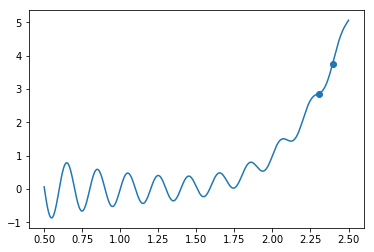

In [4]:
plt.plot(x_tru, y_tru)
plt.scatter(optim.x, optim.y)

/Users/delkind/Desktop/full_bayes_opt/jpy/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0.25537097175727397


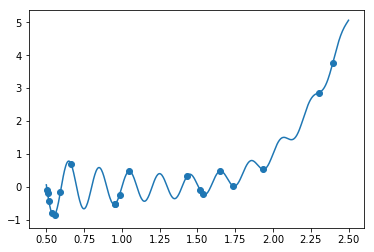

In [21]:
best_x, best_y = optim.fit(iter_opt=1, batch_size=16)
plt.plot(x_tru, y_tru)
plt.scatter(optim.x.A, optim.y)